In [1]:
import warnings

import numpy as np
import xarray as xr
from datetime import date,datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load Dataset

Load air temperature data from xarray sample datasets

In [2]:
ds = xr.tutorial.load_dataset('air_temperature')
ds #summary of the data

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [3]:
ds.var #list variables
ds.dims #=show the dimension 
ds.attrs # Show the data attributes

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...>

Frozen(SortedKeysDict({'lat': 25, 'time': 2920, 'lon': 53}))

{'Conventions': 'COARDS',
 'title': '4x daily NMC reanalysis (1948)',
 'description': 'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.',
 'platform': 'Model',
 'references': 'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html'}

In [4]:
ds.air.values; #list the values of variable 'air' in numpy-array format.
type(ds.air.values)
ds.air.attrs; #Attributes of specific variable in the dataset to show the units and other information

In [5]:
#how to Edit attributes
ds.air.attrs['Todays-date'] = date.today().strftime('%Y-%m-%d') #import date from datetime
ds.air.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32),
 'Todays-date': '2020-12-24'}

In [6]:
#How to Add new variable. Lets convert the temperature from Kelvin to degree Celsius

ds['celsius_air'] = ds.air - 273.15; #New var is also in 3D(time, lon,lat). However you can also add 2D var in a dataset consisting of 3D or 4D variables
ds['celsius_air_mean'] = ds.air.mean(dim='time') - 273.15; #2D
ds.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:           (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat               (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon               (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time, lat, lon) float32 241.2 242.5 ... 296.19 295.69
    celsius_air       (time, lat, lon) float32 -31.949997 ... 22.540009
    celsius_air_mean  (lat, lon) float32 -12.774353 -12.967407 ... 24.15503
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...>

In [7]:
#Adding Attributes to newly formed variables
ds.celsius_air.attrs # empty now
ds.celsius_air.attrs['Description'] = 'Celsius scale of air temperature'
ds.celsius_air.attrs['units'] = 'degC'
ds.celsius_air.attrs

{}

{'Description': 'Celsius scale of air temperature', 'units': 'degC'}

In [8]:
#Saving as netcdf
ds.air.encoding['_FillValue'] = False
ds.to_netcdf('new_file.nc')

In [8]:
#selecting variables
ds['air']
ds.air
ds[['air','celsius_air']]; #two variables

# Indexing and selecting data


In [9]:
#Indexing base on dimension name
ds.sel(lon=200) #select lon 200
ds.sel(lat=15)#select lat 10
ds.sel(lat=15,lon=200)#select lat 10 and lon 200 and return only 1D time series data
ds.sel(time='2013-01-01')#select a date
        
#for the selections above, exact values must be in the array cordinates

ds.sel(lat=16.9,lon=200.1, method = 'nearest') #select lat 16.9 and lon 200.1 nearest values

#Using slice to select range of lon, lat or time with the endpoints inclusive

ds.sel(lon=slice(220,260), lat=slice(50,30),time=slice("2013-01-01", "2013-12-31"))
ds['air'].sel(lon=slice(220,260,4), lat=slice(50,30),time=slice("2013-01-01", "2013-12-31")) #Every fourth lon values bewteen 220 and 260

#Selection based on location
ds.isel(lat=10) #select tenth lat
ds.isel(lat=slice(None,10)) #select first ten lat
ds.isel(lat=slice(None,10), lon=20) #select first ten lat and 20th lon postions
ds.isel(lat=slice(None,10,2), lon=20) #select every second lon between the first ten lat and 20th lon postions

ds.isel(lat=slice(None,10), lon=slice(20,None)) #select first ten lat and 20th to the end of lon postions

#Using Where but here the data size is unchanged and the positions with FALSE where condition are filled with NaN
#ds.where(ds.lat<0) for Southern Hemisphere but not in this data
ds.where(ds.lat<50)
#drop some values base on lon and lat or time values

ds['air'].drop_sel(lon=[220,260])

<xarray.Dataset>
Dimensions:           (lat: 25, time: 2920)
Coordinates:
  * lat               (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
    lon               float32 200.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time, lat) float32 241.2 243.79999 ... 296.09 297.69
    celsius_air       (time, lat) float32 -31.949997 -29.350006 ... 24.540009
    celsius_air_mean  (lat) float32 -12.774353 -10.41629 ... 24.978699 25.215942
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.Dataset>
Dimensions:           (lon: 53, time: 2920)
Coordinates:
    lat               float32 15.0
  * lon               (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time, lon) float32 296.29 296.79 297.1 ... 296.19 295.69
    celsius_air       (time, lon) float32 23.140015 23.640015 ... 22.540009
    celsius_air_mean  (lon) float32 25.215942 25.235931 ... 24.131042 24.15503
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.Dataset>
Dimensions:           (time: 2920)
Coordinates:
    lat               float32 15.0
    lon               float32 200.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time) float32 296.29 296.29 296.4 ... 297.79 297.69
    celsius_air       (time) float32 23.140015 23.140015 ... 24.640015 24.540009
    celsius_air_mean  float32 25.215942
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.Dataset>
Dimensions:           (lat: 25, lon: 53, time: 4)
Coordinates:
  * lat               (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon               (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2013-01-01T18:00:00
Data variables:
    air               (time, lat, lon) float32 241.2 242.5 243.5 ... 298.0 297.9
    celsius_air       (time, lat, lon) float32 -31.949997 -30.649994 ... 24.75
    celsius_air_mean  (lat, lon) float32 -12.774353 -12.967407 ... 24.15503
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.Dataset>
Dimensions:           (time: 2920)
Coordinates:
    lat               float32 17.5
    lon               float32 200.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time) float32 295.9 296.19998 296.19998 ... 296.29 296.09
    celsius_air       (time) float32 22.75 23.049988 ... 23.140015 22.940002
    celsius_air_mean  float32 24.978699
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.Dataset>
Dimensions:           (lat: 9, lon: 17, time: 1460)
Coordinates:
  * lat               (lat) float32 50.0 47.5 45.0 42.5 40.0 37.5 35.0 32.5 30.0
  * lon               (lon) float32 220.0 222.5 225.0 ... 255.0 257.5 260.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2013-12-31T18:00:00
Data variables:
    air               (time, lat, lon) float32 280.79 280.69998 ... 282.6 278.5
    celsius_air       (time, lat, lon) float32 7.6400146 7.549988 ... 5.350006
    celsius_air_mean  (lat, lon) float32 9.804565 9.691986 ... 19.35321
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.DataArray 'air' (time: 1460, lat: 9, lon: 5)>
array([[[280.79   , 280.29   , 265.5    , 269.79   , 254.59999],
        [282.9    , 281.79   , 268.69998, 265.79   , 258.5    ],
        [283.69998, 282.19998, 267.6    , 260.1    , 263.4    ],
        ...,
        [292.     , 288.9    , 283.9    , 270.4    , 278.5    ],
        [292.1    , 288.79   , 286.5    , 275.19998, 284.6    ],
        [291.5    , 288.9    , 287.79   , 281.5    , 288.     ]],

       [[280.9    , 280.29   , 264.     , 267.69998, 252.89   ],
        [282.69998, 282.1    , 264.79   , 265.19998, 256.38998],
        [282.9    , 282.6    , 262.4    , 259.4    , 260.79   ],
        ...,
        [292.19998, 289.69998, 282.5    , 265.     , 272.79   ],
        [291.9    , 289.79   , 287.1    , 271.6    , 277.9    ],
        [291.9    , 289.79   , 287.69998, 274.     , 282.79   ]],

       [[280.1    , 281.1    , 261.19998, 269.9    , 256.     ],
        [281.9    , 282.1    , 262.6    , 265.     , 256.19998],
        [282.1    , 282.69998, 258.69998, 260.     , 260.     ],
        ...,
...
        [292.     , 288.5    , 288.19998, 279.5    , 278.4    ],
        [292.4    , 288.9    , 288.19998, 278.79   , 277.1    ],
        [292.6    , 289.5    , 289.4    , 278.6    , 275.29   ]],

       [[282.4    , 282.19998, 272.6    , 263.19998, 240.79999],
        [284.69998, 284.1    , 276.19998, 277.29   , 246.89   ],
        [286.69998, 285.1    , 276.19998, 274.6    , 257.69998],
        ...,
        [292.1    , 288.4    , 287.5    , 273.5    , 268.29   ],
        [292.4    , 289.1    , 289.1    , 278.19998, 273.5    ],
        [292.5    , 289.69998, 290.9    , 281.69998, 275.79   ]],

       [[283.1    , 281.79   , 269.9    , 264.4    , 242.29999],
        [285.29   , 283.9    , 275.19998, 274.29   , 247.29999],
        [286.79   , 285.1    , 275.29   , 272.29   , 259.4    ],
        ...,
        [292.29   , 288.69998, 286.79   , 277.29   , 279.5    ],
        [292.5    , 289.69998, 289.19998, 282.79   , 278.4    ],
        [292.69998, 290.1    , 290.4    , 287.6    , 278.5    ]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 50.0 47.5 45.0 42.5 40.0 37.5 35.0 32.5 30.0
  * lon      (lon) float32 220.0 230.0 240.0 250.0 260.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2013-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]
    Todays-date:   2020-12-24

<xarray.Dataset>
Dimensions:           (lon: 53, time: 2920)
Coordinates:
    lat               float32 50.0
  * lon               (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time, lon) float32 277.29 277.4 ... 278.29 280.38998
    celsius_air       (time, lon) float32 4.1400146 4.25 ... 5.1400146 7.23999
    celsius_air_mean  (lon) float32 7.535614 7.5022583 ... 10.508484 11.048096
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.Dataset>
Dimensions:           (lat: 10, lon: 53, time: 2920)
Coordinates:
  * lat               (lat) float32 75.0 72.5 70.0 67.5 ... 60.0 57.5 55.0 52.5
  * lon               (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time, lat, lon) float32 241.2 242.5 ... 274.99 276.19
    celsius_air       (time, lat, lon) float32 -31.949997 ... 3.0400085
    celsius_air_mean  (lat, lon) float32 -12.774353 -12.967407 ... 9.01059
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.Dataset>
Dimensions:           (lat: 10, time: 2920)
Coordinates:
  * lat               (lat) float32 75.0 72.5 70.0 67.5 ... 60.0 57.5 55.0 52.5
    lon               float32 250.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time, lat) float32 246.5 242.0 240.39 ... 268.09 268.69
    celsius_air       (time, lat) float32 -26.649994 -31.149994 ... -4.4599915
    celsius_air_mean  (lat) float32 -15.393707 -14.242279 ... 1.068512 3.670227
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.Dataset>
Dimensions:           (lat: 5, time: 2920)
Coordinates:
  * lat               (lat) float32 75.0 70.0 65.0 60.0 55.0
    lon               float32 250.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time, lat) float32 246.5 240.39 ... 259.29 268.09
    celsius_air       (time, lat) float32 -26.649994 -32.759995 ... -5.0599976
    celsius_air_mean  (lat) float32 -15.393707 -12.133606 ... 1.068512
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.Dataset>
Dimensions:           (lat: 10, lon: 33, time: 2920)
Coordinates:
  * lat               (lat) float32 75.0 72.5 70.0 67.5 ... 60.0 57.5 55.0 52.5
  * lon               (lon) float32 250.0 252.5 255.0 ... 325.0 327.5 330.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time, lat, lon) float32 246.5 247.79999 ... 274.99 276.19
    celsius_air       (time, lat, lon) float32 -26.649994 ... 3.0400085
    celsius_air_mean  (lat, lon) float32 -15.393707 -15.359619 ... 9.01059
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.Dataset>
Dimensions:           (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat               (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon               (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time, lat, lon) float32 nan nan nan ... 296.19 295.69
    celsius_air       (time, lat, lon) float32 nan nan ... 23.040009 22.540009
    celsius_air_mean  (lat, lon) float32 nan nan nan ... 24.131042 24.15503
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 51)>
array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
...
        [293.69   , 293.88998, 295.38998, ..., 295.09   , 294.69   ,
         294.29   ],
        [296.29   , 297.19   , 297.59   , ..., 295.29   , 295.09   ,
         294.38998],
        [297.79   , 298.38998, 298.49   , ..., 295.69   , 295.49   ,
         295.19   ]],

       [[245.09   , 244.29   , 243.29   , ..., 241.68999, 241.48999,
         241.79   ],
        [249.89   , 249.29   , 248.39   , ..., 239.59   , 240.29   ,
         241.68999],
        [262.99   , 262.19   , 261.38998, ..., 239.89   , 242.59   ,
         246.29   ],
        ...,
        [293.79   , 293.69   , 295.09   , ..., 295.29   , 295.09   ,
         294.69   ],
        [296.09   , 296.88998, 297.19   , ..., 295.69   , 295.69   ,
         295.19   ],
        [297.69   , 298.09   , 298.09   , ..., 296.49   , 296.19   ,
         295.69   ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]
    Todays-date:   2020-12-24

In [10]:
#Indexing base on position like iloc in pandas

ds.isel(lon=[1], lat=[5],time=[0]) # select 2nd lon value, 6th lat value and 1st time step

ds.isel(lon=slice(0,4), lat=[5],time=slice(1,4)) # select 2nd lon value, 6th lat value and 1st time step. Here the slice does not include the endpoint


<xarray.Dataset>
Dimensions:           (lat: 1, lon: 1, time: 1)
Coordinates:
  * lat               (lat) float32 62.5
  * lon               (lon) float32 202.5
  * time              (time) datetime64[ns] 2013-01-01
Data variables:
    air               (time, lat, lon) float32 270.9
    celsius_air       (time, lat, lon) float32 -2.25
    celsius_air_mean  (lat, lon) float32 -1.2562561
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

<xarray.Dataset>
Dimensions:           (lat: 1, lon: 4, time: 3)
Coordinates:
  * lat               (lat) float32 62.5
  * lon               (lon) float32 200.0 202.5 205.0 207.5
  * time              (time) datetime64[ns] 2013-01-01T06:00:00 ... 2013-01-0...
Data variables:
    air               (time, lat, lon) float32 269.19998 268.5 ... 271.5 270.79
    celsius_air       (time, lat, lon) float32 -3.9500122 ... -2.3599854
    celsius_air_mean  (lat, lon) float32 -0.6722412 -1.2562561 ... -1.4380188
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

# Computations in Climate

In [11]:
#Field means

ds_fld = ds.sel(lon=slice(220,260), lat=slice(50,30))
ds_fld.mean(dim=['lon','lat'])
ds_fld.mean(dim='lon') #Zonal mean
ds_fld.mean(dim=['lon','lat'], skipna=True) #To skip NaN values like masked land or sea points.


<xarray.Dataset>
Dimensions:           (time: 2920)
Coordinates:
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time) float32 276.93463 275.0454 ... 273.3573 274.38867
    celsius_air       (time) float32 3.7846453 1.8954293 ... 1.2386954
    celsius_air_mean  float32 12.278452

<xarray.Dataset>
Dimensions:           (lat: 9, time: 2920)
Coordinates:
  * lat               (lat) float32 50.0 47.5 45.0 42.5 40.0 37.5 35.0 32.5 30.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time, lat) float32 270.58588 271.9388 ... 286.70175
    celsius_air       (time, lat) float32 -2.564113 -1.2111727 ... 13.551768
    celsius_air_mean  (lat) float32 6.167807 8.727771 ... 17.430075 18.728294

<xarray.Dataset>
Dimensions:           (time: 2920)
Coordinates:
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time) float32 276.93463 275.0454 ... 273.3573 274.38867
    celsius_air       (time) float32 3.7846453 1.8954293 ... 1.2386954
    celsius_air_mean  float32 12.278452

In [12]:
#Monthly means

ds_monthly= ds.resample(time="1MS").mean(dim="time") #monthly means of daily data


In [13]:
#climatology
ds.groupby('time.month').mean('time') #either use the monthly or daily data
ds_air_clim= ds.air.groupby('time.month').mean('time') #climatilogy of air temperature only

#Anomalies 
ano = ds.air.groupby('time.month') - ds_air_clim


<xarray.Dataset>
Dimensions:           (lat: 25, lon: 53, month: 12)
Coordinates:
  * lat               (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon               (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    air               (month, lat, lon) float32 246.34987 ... 297.53763
    celsius_air       (month, lat, lon) float32 -26.80023 ... 24.38772
    celsius_air_mean  (month, lat, lon) float32 -12.774353 ... 24.15503

In [14]:
#Seasonal Averages: Due to different number of days in each month(e.g DJF, we need to consider weighting factors based on the number of days in each month
# See http://xarray.pydata.org/en/latest/examples/monthly-means.html for more explanation

#function from http://xarray.pydata.org/en/latest/examples/monthly-means.html
def season_mean(ds, calendar='standard'):
    # Make a DataArray with the number of days in each month, size = len(time)
    month_length = ds.time.dt.days_in_month

    # Calculate the weights by grouping by 'time.season'
    weights = month_length.groupby('time.season') / month_length.groupby('time.season').sum()

    # Test that the sum of the weights for each season is 1.0
    np.testing.assert_allclose(weights.groupby('time.season').sum().values, np.ones(4))

    # Calculate the weighted average
    return (ds * weights).groupby('time.season').sum(dim='time')

In [17]:
ds_sm = season_mean(ds, calendar='standard')  #get the seasonal average

# Plot

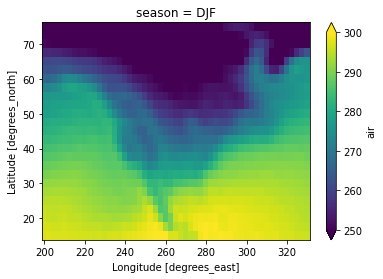

In [22]:
ds_sm.air[0,:,:].plot(vmin=250, vmax=300)

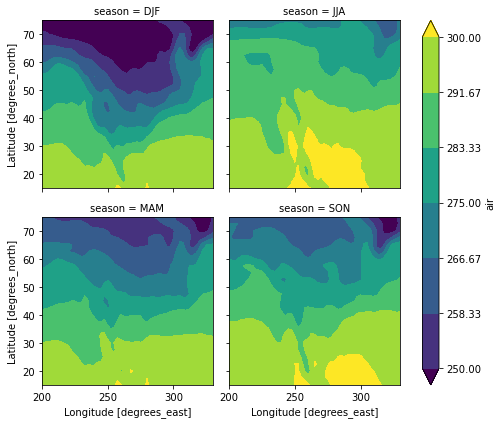

In [29]:
ds_sm.air.plot.contourf(x='lon', y='lat', col='season', col_wrap=2, vmin=250, vmax=300)

In [25]:
ds_sm

<xarray.Dataset>
Dimensions:           (lat: 25, lon: 53, season: 4)
Coordinates:
  * lat               (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon               (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * season            (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    air               (season, lat, lon) float64 247.0 247.0 ... 299.4 299.5
    celsius_air       (season, lat, lon) float64 -26.13 -26.18 ... 26.22 26.33
    celsius_air_mean  (season, lat, lon) float64 -12.77 -12.97 ... 24.13 24.16

In [30]:
# Find Anomalies using apply

def remove_time_mean(x):
    return x - x.mean(dim='time')

ds_anom = ds.groupby('time.month').apply(remove_time_mean)
ds_anom

<xarray.Dataset>
Dimensions:           (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat               (lat) float32 75.0 72.5 70.0 67.5 ... 22.5 20.0 17.5 15.0
  * lon               (lon) float32 200.0 202.5 205.0 ... 325.0 327.5 330.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air               (time, lat, lon) float32 -5.149872 ... -1.8476257
    celsius_air       (time, lat, lon) float32 -5.149767 ... -1.8477116
    celsius_air_mean  (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

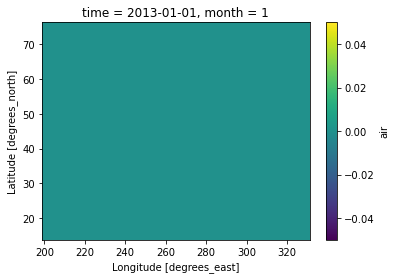

In [36]:
#ds_anom.air[0,:,:].plot()
(ds_anom.air[0,:,:] - ano[0,:,:]).plot()

In [ ]:
#To average the data every five years
#ds_anom_resample = ds_anom.resample(time='5Y').mean(dim='time')
#ds_anom_resample

#Rolling mean (12 months rolling mean)
#ds_anom_rolling = ds_anom.rolling(time=12, center=True).mean()
